# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [45]:

df = pd.read_csv('marketing.csv')

# Display the first 5 rows
print(df.head(5))
print("Shape of the dataset:", df.shape) #Shape of the DataSet
print("\nInformation about the dataset:") #Information of the DataSet
print(df.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    4/9/2012       58       635  ...                   10                  4   
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
df = pd.read_csv('marketing.csv')
#percentage of missing values
missing_percentages = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n")
print(missing_percentages)

# Treat missing values
df_dropped = df.dropna()
df_filled = df.fillna(0)
df_mean_filled = df.fillna(df.mean()) 

# Display the first 5 rows
print("\nFirst 5 rows of the dataframe after dropping missing values:\n")
print(df_dropped.head(5))

print("\nFirst 5 rows of the dataframe after filling missing values with 0:\n")
print(df_filled.head(5))

print("\nFirst 5 rows of the dataframe after filling missing values with column mean:\n")
print(df_mean_filled.head(5))

Percentage of missing values:

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

First 5 rows of the dataframe after dropping missing values:

     ID  Year_Birth   Educa

C:\Users\hpg13\AppData\Local\Temp\ipykernel_25408\3068580823.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_filled = df.fillna(df.mean())  # Replace missing values with column mean


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [10]:
# Check for duplicate records
is_duplicate = df.duplicated()
duplicate_count = is_duplicate.sum()

if duplicate_count > 0:
    print("Number of duplicate records:", duplicate_count)
    print("Dropping duplicate records...")
    df = df.drop_duplicates()
    print("Duplicate records dropped.")
else:
    print("No duplicate records found.")

print("\nFirst 5 rows of the dataframe after dropping duplicates:")
print(df.head(5))


No duplicate records found.

First 5 rows of the dataframe after dropping duplicates:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


### 5. Drop the columns which you think redundant for the analysis 

In [19]:
#Identify
redundant_columns = ['ID','Dt_Customer']
# Drop 
df = df.drop(redundant_columns, axis=1)
print("Columns after dropping redundant columns:")
print(df.columns)


Columns after dropping redundant columns:
Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [50]:
# Check unique categories 
unique_categories = df['Marital_Status'].unique()
print("Unique categories in the 'Marital_Status' column:")
print(unique_categories)
# Group together
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')
# Verify the modifiedcolumn
modified_categories = df['Marital_Status'].unique()
print("\nModified categories in the 'Marital_Status' column:")
print(modified_categories)

Unique categories in the 'Marital_Status' column:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Modified categories in the 'Marital_Status' column:
['Single' 'relationship']


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [14]:
# Group columns as 'Total_Expenses'
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    4/9/2012       58       635  ...                  4                  7   
1    8/3/2014       38        11  ...                  2                  5   
2  21-08-2013       26       426  ...                 10                  4   
3   10/2/2014       26        11  ...                  4                  6   
4  19-01-2014       94       173  ...                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [15]:
# Group columns as 'Num_Total_Purchases'
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7             0   
1    8/3/2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3   10/2/2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0    

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [16]:
df['Kids'] = df[['Kidhome', 'Teenhome']].sum(axis=1)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0    4/9/2012       58       635  ...             0             0   
1    8/3/2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3   10/2/2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0      

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [17]:
# Group columns as 'TotalAcceptedCmp'
accepted_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['TotalAcceptedCmp'] = df[accepted_columns].sum(axis=1)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0    4/9/2012       58       635  ...             0             0   
1    8/3/2014       38        11  ...             0             0   
2  21-08-2013       26       426  ...             0             0   
3   10/2/2014       26        11  ...             0             0   
4  19-01-2014       94       173  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Total_Expenses  \
0             0             0         0        

### 11. Drop those columns which we have used above for obtaining new features

In [18]:
# Group the columns as 'Total_Expenses'
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
# Group the columns
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Drop the columns
columns_to_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df = df.drop(columns_to_drop, axis=1)
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation   relationship  71613.0        0         0   
3  6182        1984  Graduation   relationship  26646.0        1         0   
4  5324        1981         PhD   relationship  58293.0        1         0   

  Dt_Customer  Recency  NumWebVisitsMonth  ...  AcceptedCmp4  AcceptedCmp5  \
0    4/9/2012       58                  7  ...             0             0   
1    8/3/2014       38                  5  ...             0             0   
2  21-08-2013       26                  4  ...             0             0   
3   10/2/2014       26                  6  ...             0             0   
4  19-01-2014       94                  5  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Total_Expen

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [20]:
current_year = datetime.now().year
df['age'] = current_year - df['Year_Birth']

df = df.drop('Year_Birth', axis=1)
print(df.head())

     ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0  5524  Graduation         Single  58138.0        0         0    4/9/2012   
1  2174  Graduation         Single  46344.0        1         1    8/3/2014   
2  4141  Graduation   relationship  71613.0        0         0  21-08-2013   
3  6182  Graduation   relationship  26646.0        1         0   10/2/2014   
4  5324         PhD   relationship  58293.0        1         0  19-01-2014   

   Recency  NumWebVisitsMonth  AcceptedCmp3  ...  AcceptedCmp5  AcceptedCmp1  \
0       58                  7             0  ...             0             0   
1       38                  5             0  ...             0             0   
2       26                  4             0  ...             0             0   
3       26                  6             0  ...             0             0   
4       94                  5             0  ...             0             0   

   AcceptedCmp2  Complain  Response  Total_Expense

### 13. Encode the categorical variables in the dataset

In [22]:
#Get dummies
df_encoded = pd.get_dummies(df)
print(df_encoded.head())

#LabelEncoder
encoder = LabelEncoder()
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = encoder.fit_transform(df[col])
print(df_encoded.head())

     ID   Income  Kidhome  Teenhome  Recency  NumWebVisitsMonth  AcceptedCmp3  \
0  5524  58138.0        0         0       58                  7             0   
1  2174  46344.0        1         1       38                  5             0   
2  4141  71613.0        0         0       26                  4             0   
3  6182  26646.0        1         0       26                  6             0   
4  5324  58293.0        1         0       94                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  ...  Dt_Customer_9/4/2014  \
0             0             0             0  ...                     0   
1             0             0             0  ...                     0   
2             0             0             0  ...                     0   
3             0             0             0  ...                     0   
4             0             0             0  ...                     0   

   Dt_Customer_9/5/2013  Dt_Customer_9/5/2014  Dt_Customer_9/6/2013 

### 14. Standardize the columns, so that values are in a particular range

In [51]:
columns_to_standardize = ['ID','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response'
]
numeric_columns = [col for col in columns_to_standardize if pd.api.types.is_numeric_dtype(df[col])]

# StandardScaler
scaler = StandardScaler()
# Standardize
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df.head())

         ID  Year_Birth   Education Marital_Status    Income   Kidhome  \
0 -0.020999        1957  Graduation         Single  0.234063 -0.825218   
1 -1.053058        1954  Graduation         Single -0.234559  1.032559   
2 -0.447070        1965  Graduation   relationship  0.769478 -0.825218   
3  0.181716        1984  Graduation   relationship -1.017239  1.032559   
4 -0.082614        1981         PhD   relationship  0.240221  1.032559   

   Teenhome Dt_Customer   Recency  MntWines  ...  NumCatalogPurchases  \
0 -0.929894    4/9/2012  0.307039       635  ...                   10   
1  0.906934    8/3/2014 -0.383664        11  ...                    1   
2 -0.929894  21-08-2013 -0.798086       426  ...                    2   
3 -0.929894   10/2/2014 -0.798086        11  ...                    0   
4 -0.929894  19-01-2014  1.550305       173  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4           0.693904      

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [32]:
target_column = 'Education'
df[target_column] = df[target_column].replace({'Graduation':0,'Basic':1,'Master': 2, 'PhD': 3,'2n Cycle':4})
target_column1 = 'Marital_Status'
df[target_column1] = df[target_column1].replace({'Single':0,'Together':1,'Married': 2,'Divorced':3 ,'Widow':4, 'Alone':5, 'Absurd' :6,'YOLO':7})
df.to_csv("marketing_modified.csv", index=False)
print(df.head())

   Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0        1957          0               0  0.234063 -0.825218 -0.929894   
1        1954          0               0 -0.234559  1.032559  0.906934   
2        1965          0               1  0.769478 -0.825218 -0.929894   
3        1984          0               1 -1.017239  1.032559 -0.929894   
4        1981          3               2  0.240221  1.032559 -0.929894   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0  0.307039       635         88              546  ...                   10   
1 -0.383664        11          1                6  ...                    1   
2 -0.798086       426         49              127  ...                    2   
3 -0.798086        11          4               20  ...                    0   
4  1.550305       173         43              118  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0        

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
csv_file_path = 'marketing_modified.csv'
df = pd.read_csv(csv_file_path)
df.fillna(df.mean(), inplace=True)
# Extract the features (X) to a numpy array
X = df.values

# Data Preparation
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#  PCA object
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

# 'pca_result' 
print("PCA Result:")
print(pca_result)
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

PCA Result:
[[ 3.760659   -0.37373623]
 [-2.37760577 -0.03982804]
 [ 1.62405658 -0.05869969]
 ...
 [ 1.50537827  0.13855893]
 [ 1.74244864  1.26988328]
 [-1.68492255  0.87596593]]
Explained Variance Ratio:
[0.2606722  0.08221886]


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

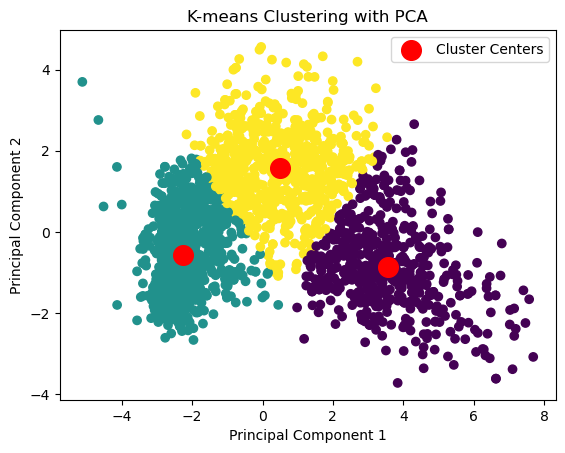

In [25]:

# K-means clustering
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Visualize the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.legend()
plt.show()


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [37]:
num_clusters = 3  
clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering.fit_predict(X_std)

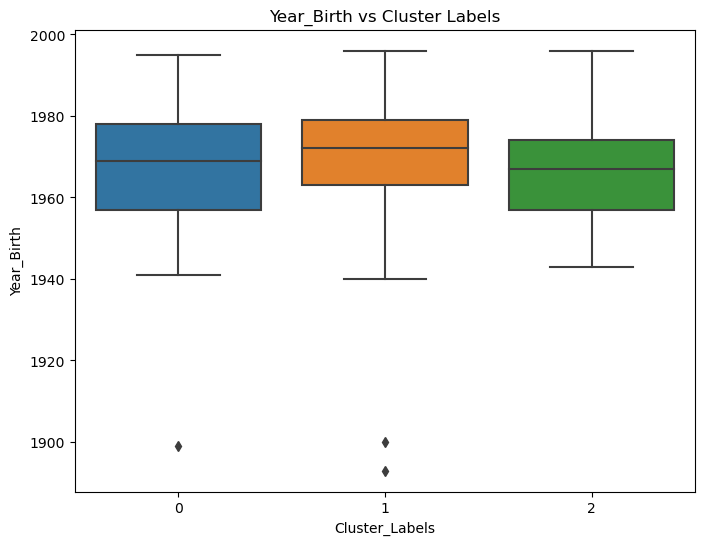

Mean Year_Birth for each cluster:
Cluster_Labels
0    1968.035959
1    1971.054402
2    1965.978295
Name: Year_Birth, dtype: float64




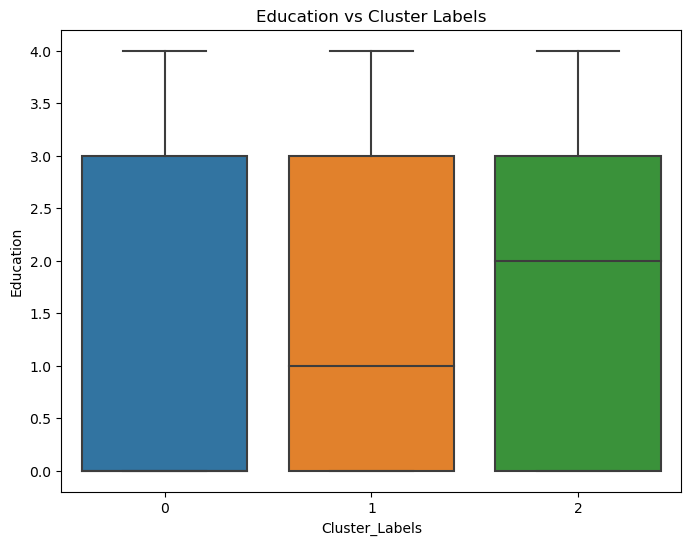

Mean Education for each cluster:
Cluster_Labels
0    1.222603
1    1.429278
2    1.403101
Name: Education, dtype: float64




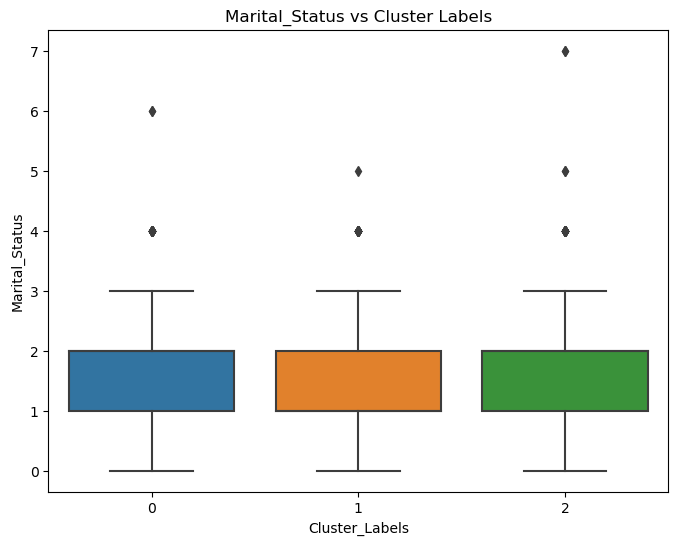

Mean Marital_Status for each cluster:
Cluster_Labels
0    1.474315
1    1.406528
2    1.658915
Name: Marital_Status, dtype: float64




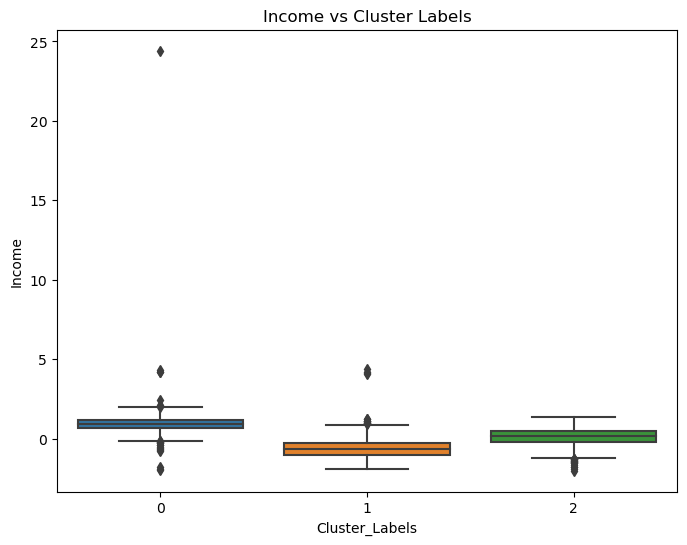

Mean Income for each cluster:
Cluster_Labels
0    0.943577
1   -0.604075
2    0.092512
Name: Income, dtype: float64




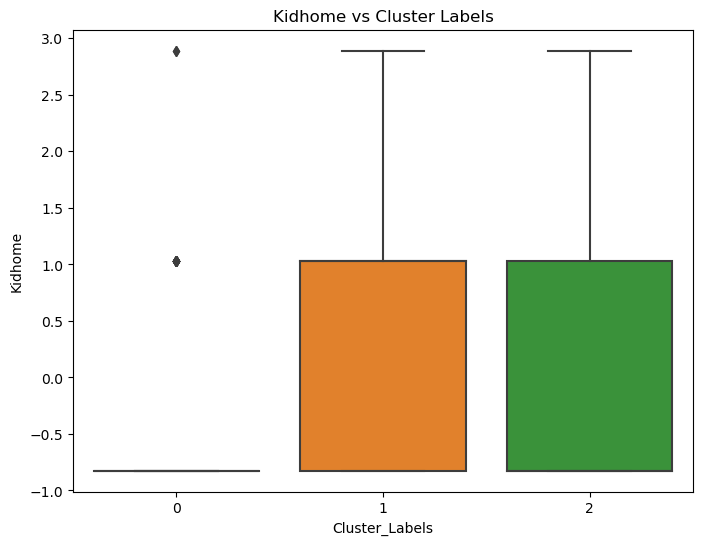

Mean Kidhome for each cluster:
Cluster_Labels
0   -0.748871
1    0.545605
2   -0.177156
Name: Kidhome, dtype: float64




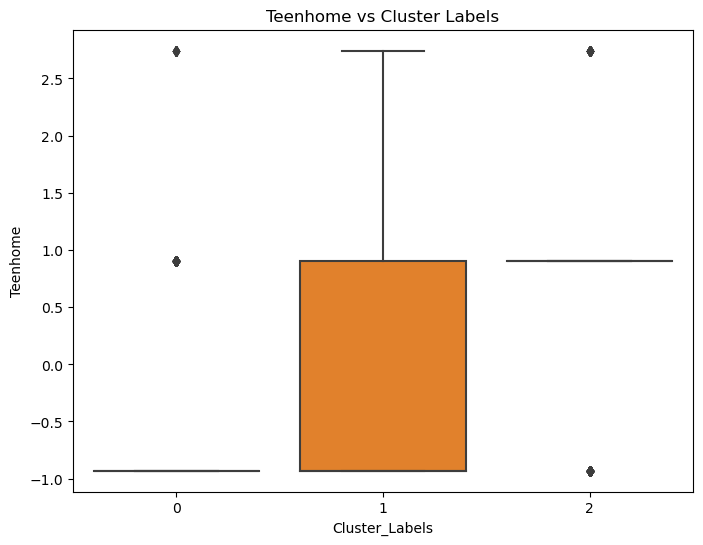

Mean Teenhome for each cluster:
Cluster_Labels
0   -0.489559
1   -0.090513
2    0.585133
Name: Teenhome, dtype: float64




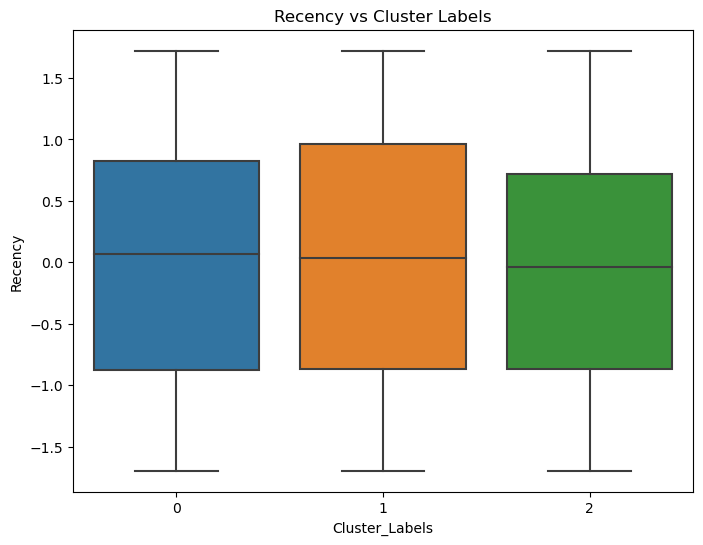

Mean Recency for each cluster:
Cluster_Labels
0    0.006394
1    0.030245
2   -0.053197
Name: Recency, dtype: float64




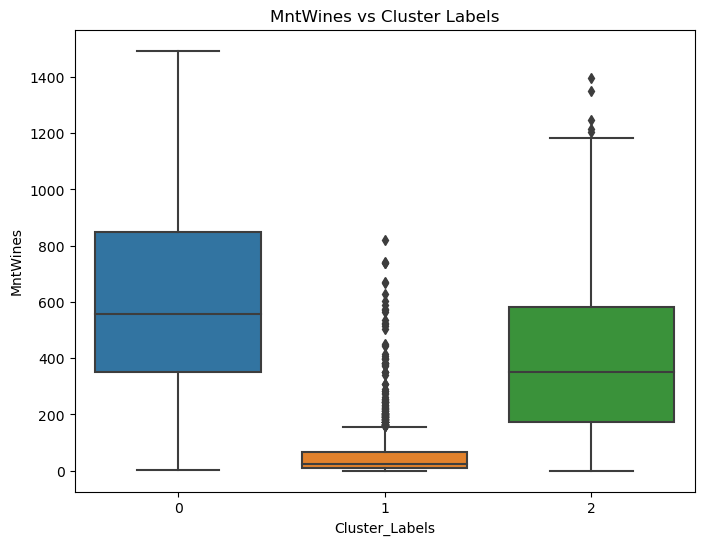

Mean MntWines for each cluster:
Cluster_Labels
0    611.568493
1     62.030663
2    404.568992
Name: MntWines, dtype: float64




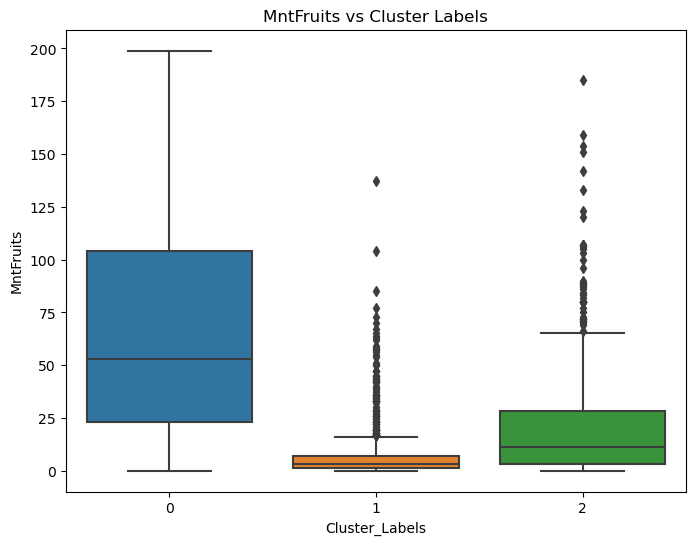

Mean MntFruits for each cluster:
Cluster_Labels
0    65.967466
1     6.971316
2    20.688372
Name: MntFruits, dtype: float64




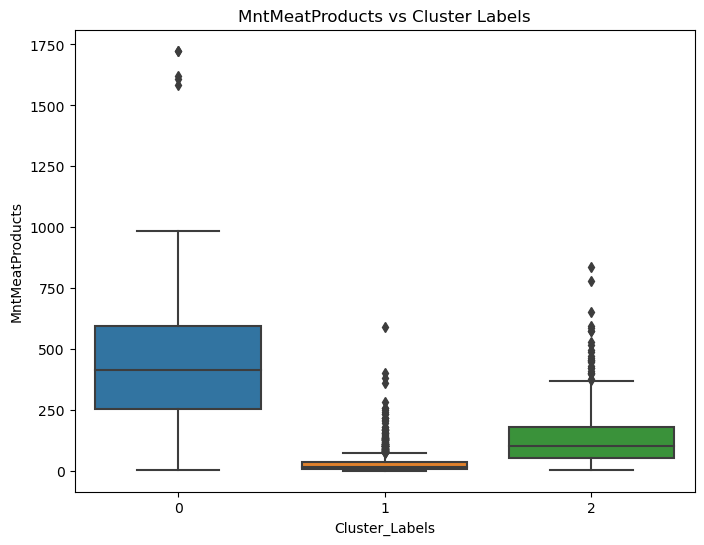

Mean MntMeatProducts for each cluster:
Cluster_Labels
0    440.895548
1     31.831850
2    130.702326
Name: MntMeatProducts, dtype: float64




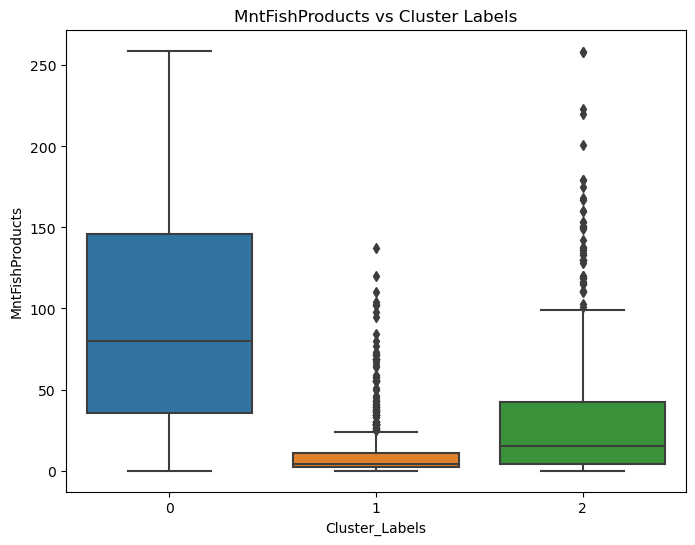

Mean MntFishProducts for each cluster:
Cluster_Labels
0    93.501712
1     9.546983
2    30.697674
Name: MntFishProducts, dtype: float64




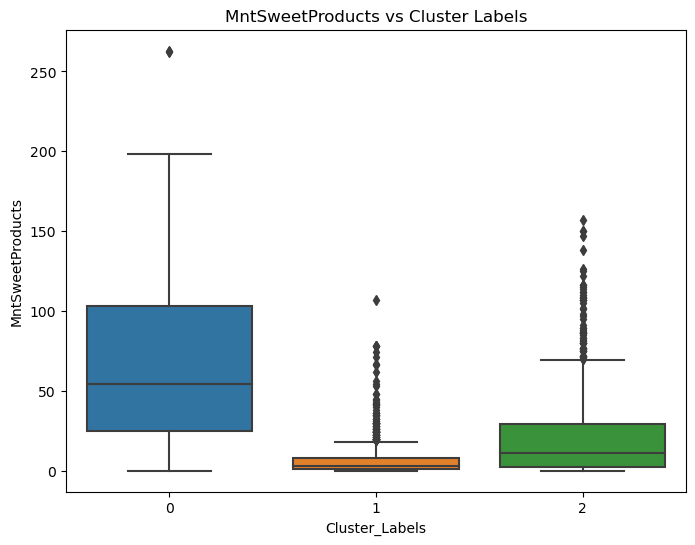

Mean MntSweetProducts for each cluster:
Cluster_Labels
0    67.950342
1     6.543027
2    22.206202
Name: MntSweetProducts, dtype: float64




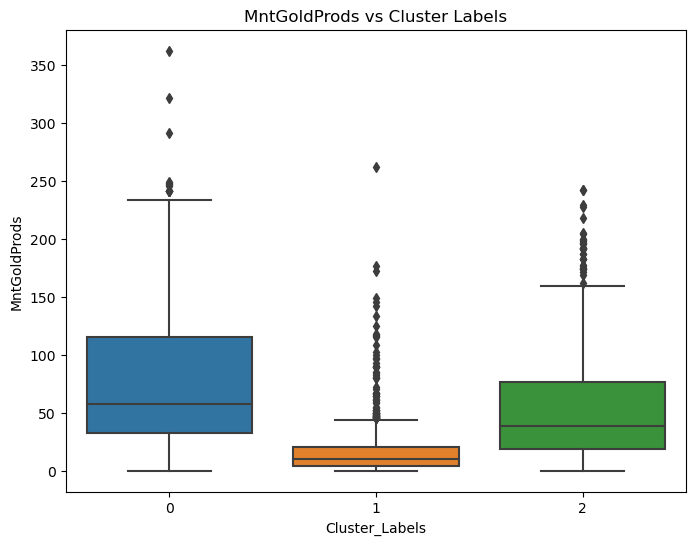

Mean MntGoldProds for each cluster:
Cluster_Labels
0    79.383562
1    16.563798
2    55.043411
Name: MntGoldProds, dtype: float64




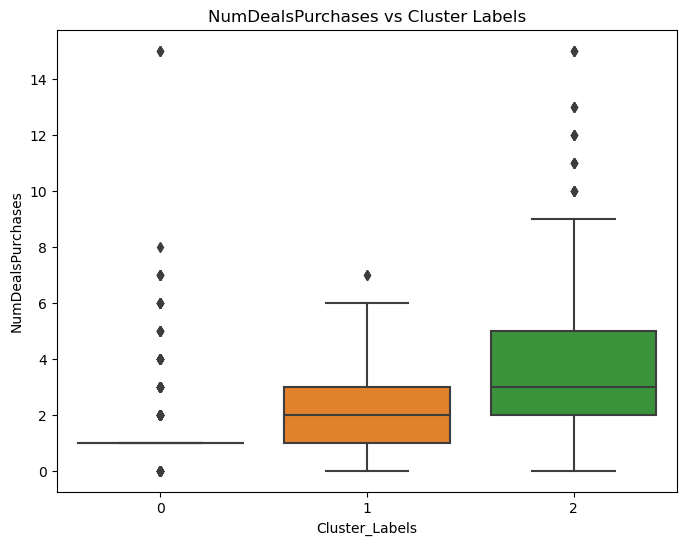

Mean NumDealsPurchases for each cluster:
Cluster_Labels
0    1.493151
1    1.966370
2    3.640310
Name: NumDealsPurchases, dtype: float64




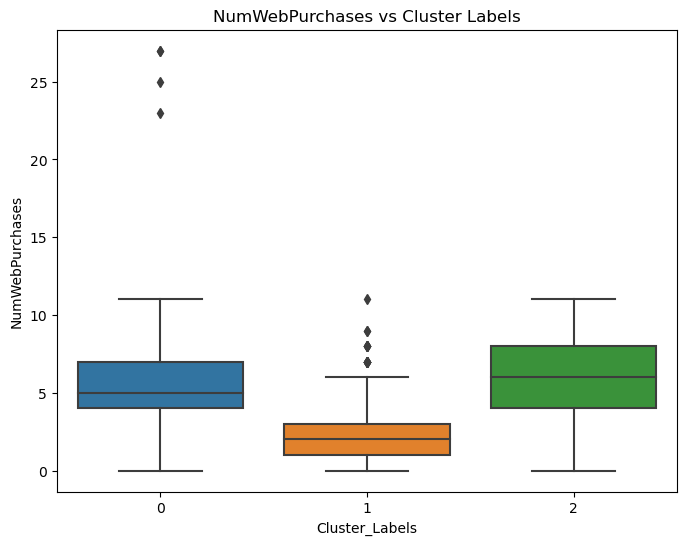

Mean NumWebPurchases for each cluster:
Cluster_Labels
0    5.361301
1    2.288823
2    5.744186
Name: NumWebPurchases, dtype: float64




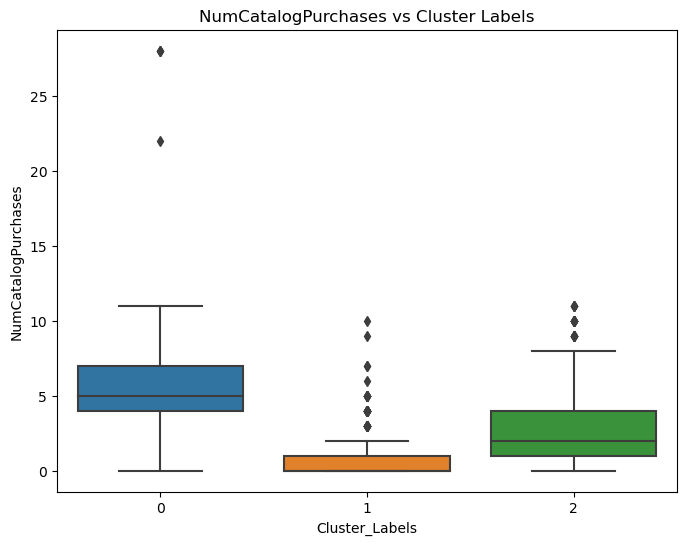

Mean NumCatalogPurchases for each cluster:
Cluster_Labels
0    5.734589
1    0.696340
2    2.961240
Name: NumCatalogPurchases, dtype: float64




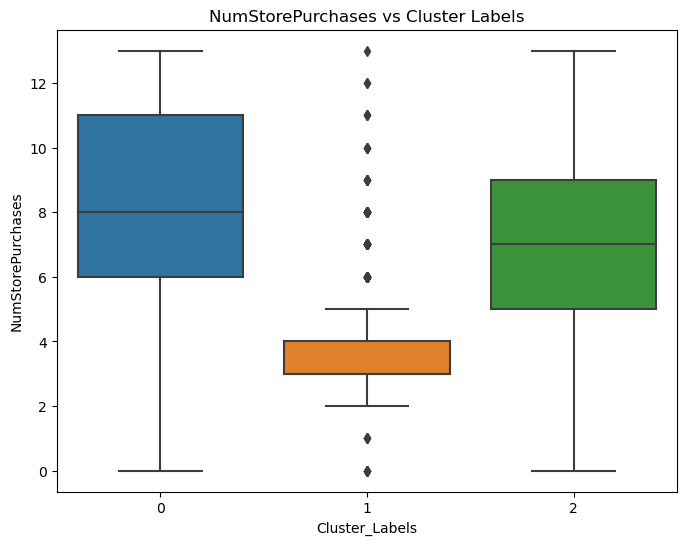

Mean NumStorePurchases for each cluster:
Cluster_Labels
0    8.241438
1    3.564787
2    7.058915
Name: NumStorePurchases, dtype: float64




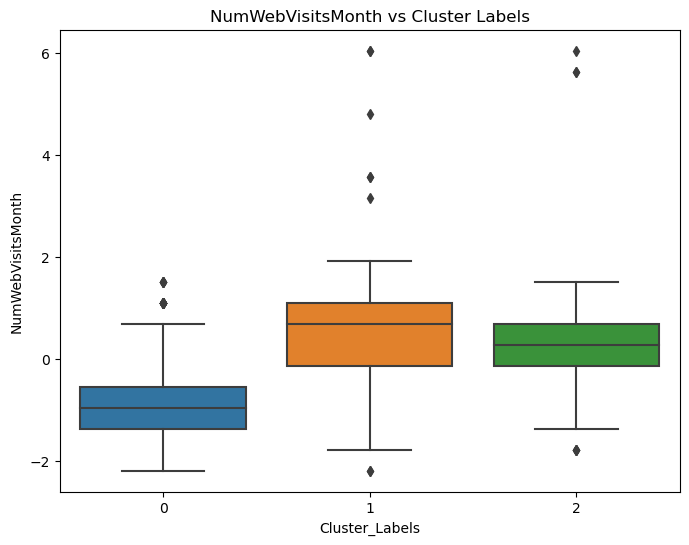

Mean NumWebVisitsMonth for each cluster:
Cluster_Labels
0   -0.926599
1    0.361629
2    0.272134
Name: NumWebVisitsMonth, dtype: float64




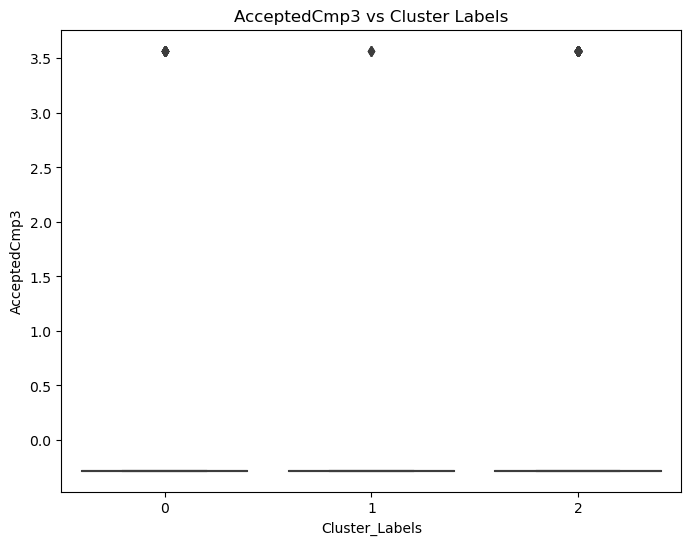

Mean AcceptedCmp3 for each cluster:
Cluster_Labels
0   -0.062601
1   -0.268717
2    0.477879
Name: AcceptedCmp3, dtype: float64




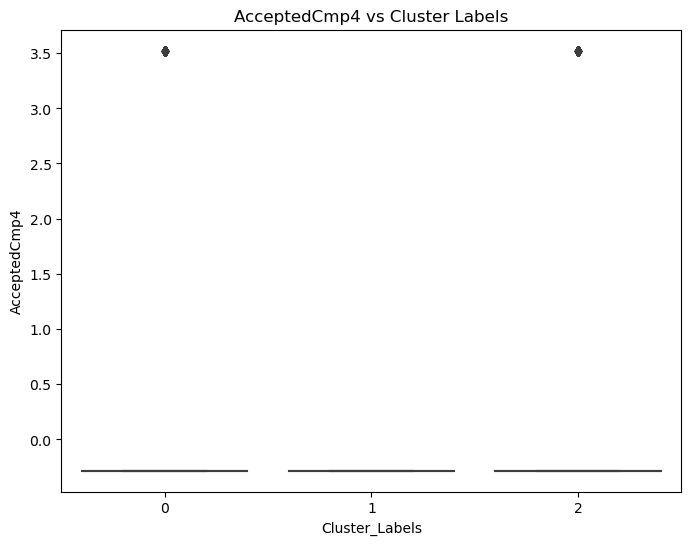

Mean AcceptedCmp4 for each cluster:
Cluster_Labels
0    0.335470
1   -0.283830
2    0.141144
Name: AcceptedCmp4, dtype: float64




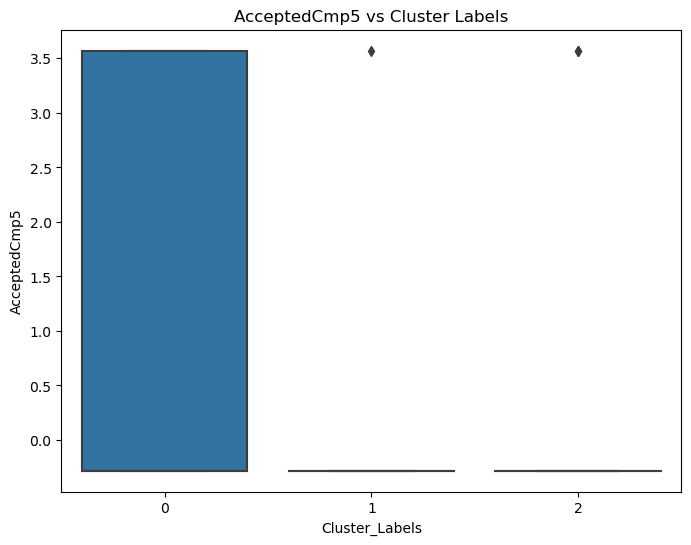

Mean AcceptedCmp5 for each cluster:
Cluster_Labels
0    0.774594
1   -0.276332
2   -0.268203
Name: AcceptedCmp5, dtype: float64




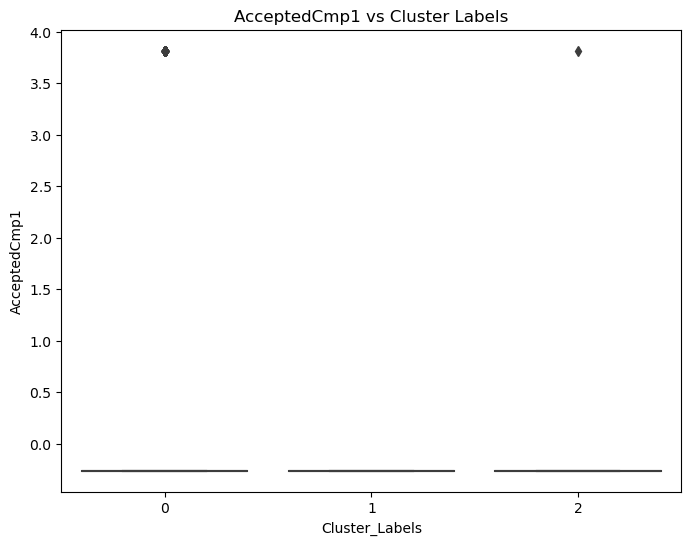

Mean AcceptedCmp1 for each cluster:
Cluster_Labels
0    0.736265
1   -0.262111
2   -0.255790
Name: AcceptedCmp1, dtype: float64




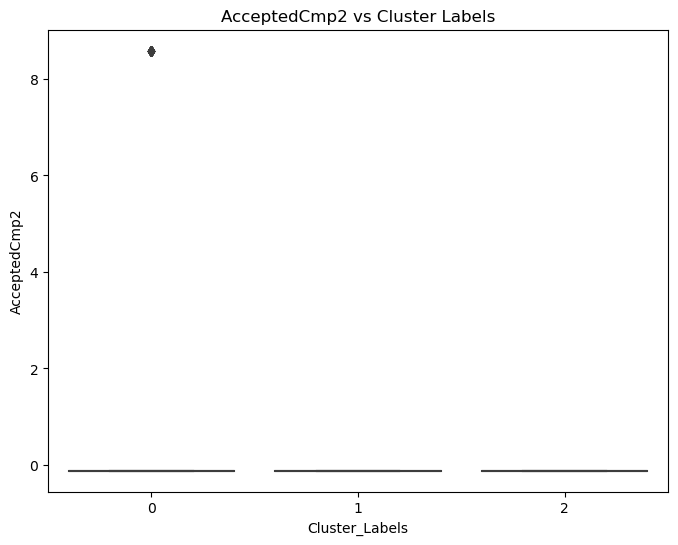

Mean AcceptedCmp2 for each cluster:
Cluster_Labels
0    0.330379
1   -0.116510
2   -0.116510
Name: AcceptedCmp2, dtype: float64




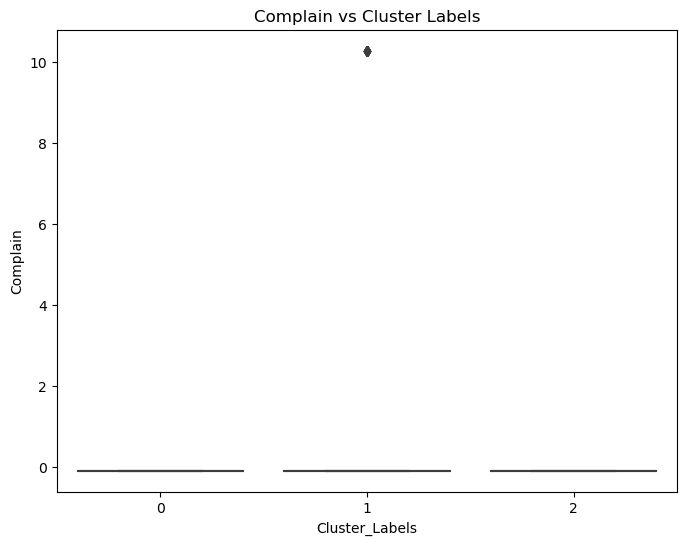

Mean Complain for each cluster:
Cluster_Labels
0   -0.097282
1    0.118258
2   -0.097282
Name: Complain, dtype: float64




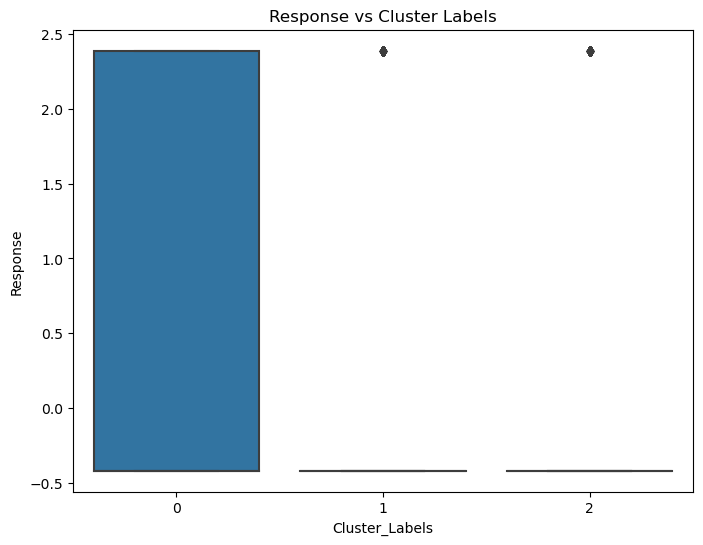

Mean Response for each cluster:
Cluster_Labels
0    0.413049
1   -0.221451
2   -0.026874
Name: Response, dtype: float64




In [38]:
df['Cluster_Labels'] = cluster_labels

#Bivariate Analysis 
for feature in df.columns[:-1]: 
    # Box plot 
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(x='Cluster_Labels', y=feature, data=df)
    ax.set_title(f"{feature} vs Cluster Labels")
    plt.show()
    
    #mean value of the feature for each cluster
    mean_per_cluster = df.groupby('Cluster_Labels')[feature].mean()
    print(f"Mean {feature} for each cluster:")
    print(mean_per_cluster)
    print("\n")

### Visualization and Interpretation of results

-----
## Happy Learning
-----